# 서울시 따릉이 자전거 이용 예측 AI모델

## 데이터 로드 및 확인

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('./data/train.csv')

In [ ]:
df.head(2)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0


In [ ]:
df = df.drop('id',axis=1)
df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
# 컬럼명이 길어서, 타이핑하기 쉽게 변경
df.columns=['hour','temp','precipation','wind','humid','visibility','ozone','pm1','pm2','cnt']

In [ ]:
df.head()

,hour,temp,precipation,wind,humid,visibility,ozone,pm1,pm2,cnt
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


array([[<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'precipation'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'humid'}>,
        <AxesSubplot:title={'center':'visibility'}>],
       [<AxesSubplot:title={'center':'ozone'}>,
        <AxesSubplot:title={'center':'pm1'}>,
        <AxesSubplot:title={'center':'pm2'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

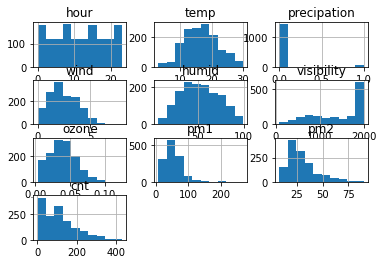

In [ ]:
df.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         1459 non-null   int64  
 1   temp         1457 non-null   float64
 2   precipation  1457 non-null   float64
 3   wind         1450 non-null   float64
 4   humid        1457 non-null   float64
 5   visibility   1457 non-null   float64
 6   ozone        1383 non-null   float64
 7   pm1          1369 non-null   float64
 8   pm2          1342 non-null   float64
 9   cnt          1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [ ]:
df.describe()

,hour,temp,precipation,wind,humid,visibility,ozone,pm1,pm2,cnt
count,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


# 1번 모델

## 데이터 전처리

hour, visibility는 정규분포형태 X -> minmaxscaling <br>
temp, wind, humid, ozone, pm1, pm2 -> standardscaling <br>
하지만, temp, wind는 합칠 수도 있을 것 같다. (체감온도)
- 13.12+0.6215×T-11.37xV^(0.16)+0.3965xV^(0.16)×T

나중에 모델 성능이 높이는 용도로 써보자

In [ ]:
df.head(1)

,hour,temp,precipation,wind,humid,visibility,ozone,pm1,pm2,cnt
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0


In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         1459 non-null   int64  
 1   temp         1457 non-null   float64
 2   precipation  1457 non-null   float64
 3   wind         1450 non-null   float64
 4   humid        1457 non-null   float64
 5   visibility   1457 non-null   float64
 6   ozone        1383 non-null   float64
 7   pm1          1369 non-null   float64
 8   pm2          1342 non-null   float64
 9   cnt          1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [ ]:
df1['temp'] = df1['temp'].fillna(df1['temp'].mean())
df1['precipation'] = df1['precipation'].fillna(0)
df1['wind'] = df1['wind'].fillna(df1['wind'].mean())
df1['humid'] = df1['humid'].fillna(df1['humid'].mean())
df1['visibility'] = df1['visibility'].fillna(df1['visibility'].mean())
df1['ozone'] = df1['ozone'].fillna(df1['ozone'].mean())
df1['pm1'] = df1['pm1'].fillna(df1['pm1'].mean())
df1['pm2'] = df1['pm2'].fillna(df1['pm2'].mean())
# df1.dropna(inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         1459 non-null   int64  
 1   temp         1459 non-null   float64
 2   precipation  1459 non-null   float64
 3   wind         1459 non-null   float64
 4   humid        1459 non-null   float64
 5   visibility   1459 non-null   float64
 6   ozone        1459 non-null   float64
 7   pm1          1459 non-null   float64
 8   pm2          1459 non-null   float64
 9   cnt          1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# hour_scaler = MinMaxScaler()
vis_scaler = MinMaxScaler()
temp_scaler = StandardScaler()
humid_scaler = StandardScaler()
ozone_scaler = StandardScaler()
pm1_scaler = StandardScaler()
pm2_scaler = StandardScaler()

In [ ]:
# hour_scaler.fit(df1['hour'].to_frame())
vis_scaler.fit(df1['visibility'].to_frame())
temp_scaler.fit(df1['temp'].to_frame())
humid_scaler.fit(df1['humid'].to_frame())
ozone_scaler.fit(df1['ozone'].to_frame())
pm1_scaler.fit(df1['pm1'].to_frame())
pm2_scaler.fit(df1['pm2'].to_frame())

StandardScaler()

In [ ]:
# df1['hour'] = hour_scaler.transform(df1['hour'].to_frame())
df1['visibility'] = vis_scaler.transform(df1['visibility'].to_frame())
df1['temp'] = temp_scaler.transform(df1['temp'].to_frame())
df1['humid'] = humid_scaler.transform(df1['humid'].to_frame())
df1['ozone'] = ozone_scaler.transform(df1['ozone'].to_frame())
df1['pm1'] = pm1_scaler.transform(df1['pm1'].to_frame())
df1['pm2'] = pm2_scaler.transform(df1['pm2'].to_frame())

array([[<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'precipation'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'humid'}>,
        <AxesSubplot:title={'center':'visibility'}>],
       [<AxesSubplot:title={'center':'ozone'}>,
        <AxesSubplot:title={'center':'pm1'}>,
        <AxesSubplot:title={'center':'pm2'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

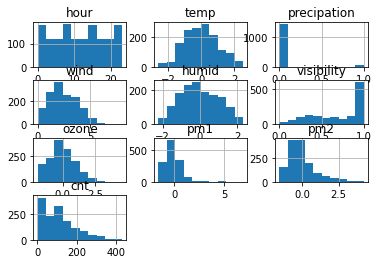

In [ ]:
df1.hist()

In [ ]:
df1.describe()

,hour,temp,precipation,wind,humid,visibility,ozone,pm1,pm2,cnt
count,1459.000000,1.459000e+03,1459.000000,1459.000000,1.459000e+03,1459.000000,1.459000e+03,1.459000e+03,1.459000e+03,1459.000000
mean,11.493489,2.541566e-17,0.031528,2.479034,4.946162e-18,0.690539,-1.099189e-16,-4.679830e-17,-2.296541e-16,108.563400
std,6.922790,1.000343e+00,0.174801,1.374005,1.000343e+00,0.303190,1.000343e+00,1.000343e+00,1.000343e+00,82.631733
min,0.000000,-2.601845e+00,0.000000,0.000000,-2.222730e+00,0.000000,-1.903809e+00,-1.565737e+00,-1.582841e+00,1.000000
25%,5.500000,-7.484929e-01,0.000000,1.400000,-7.976290e-01,0.417274,-6.924984e-01,-6.555897e-01,-6.612296e-01,37.000000
50%,11.000000,-2.243761e-02,0.000000,2.400000,-6.050769e-02,0.779396,-4.019857e-15,-1.355058e-01,-1.649772e-01,96.000000
75%,17.500000,6.367442e-01,0.000000,3.400000,7.994671e-01,0.996878,6.241434e-01,3.520729e-01,4.021684e-01,150.000000
max,23.000000,2.537863e+00,1.000000,8.000000,2.298280e+00,1.000000,4.521403e+00,6.885627e+00,4.230401e+00,431.000000


## 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,:-1],df1.iloc[:,-1],
                                                   test_size=0.3, random_state=0)

In [ ]:
lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred,squared=False)

50.530585370109364

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)

In [ ]:
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

35.91346285932262

In [ ]:
gbm_reg.fit(X_train, y_train)
pred = gbm_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

37.947454129441255

In [ ]:
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

36.833178663074115

# 2번 모델

hour, visibility는 정규분포형태 X -> minmaxscaling <br>
temp, wind, humid, ozone, pm1, pm2 -> standardscaling <br>
하지만, temp, wind는 합칠 수도 있을 것 같다. (체감온도)
- 13.12+0.6215×T-11.37xV^(0.16)+0.3965xV^(0.16)×T

나중에 모델 성능이 높이는 용도로 써보자

In [ ]:
df.head(1)

,hour,temp,precipation,wind,humid,visibility,ozone,pm1,pm2,cnt
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0


In [ ]:
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         1459 non-null   int64  
 1   temp         1457 non-null   float64
 2   precipation  1457 non-null   float64
 3   wind         1450 non-null   float64
 4   humid        1457 non-null   float64
 5   visibility   1457 non-null   float64
 6   ozone        1383 non-null   float64
 7   pm1          1369 non-null   float64
 8   pm2          1342 non-null   float64
 9   cnt          1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [ ]:
df2['ctemp'] = 13.12+0.6215*df2['temp']-11.37*df2['wind']**(0.16)+0.3965*df2['wind']**(0.16)*df2['temp']

In [ ]:
df2['temp'] = df2['temp'].fillna(df2['temp'].mean())
df2['ctemp'] = df2['ctemp'].fillna(df2['ctemp'].mean())
df2['precipation'] = df2['precipation'].fillna(0)
df2['wind'] = df2['wind'].fillna(df2['wind'].mean())
df2['humid'] = df2['humid'].fillna(df2['humid'].mean())
df2['visibility'] = df2['visibility'].fillna(df2['visibility'].mean())
df2['ozone'] = df2['ozone'].fillna(df2['ozone'].mean())
df2['pm1'] = df2['pm1'].fillna(df2['pm1'].mean())
df2['pm2'] = df2['pm2'].fillna(df2['pm2'].mean())
# df1.dropna(inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         1459 non-null   float64
 1   precipation  1459 non-null   float64
 2   humid        1459 non-null   float64
 3   visibility   1459 non-null   float64
 4   ozone        1459 non-null   float64
 5   pm1          1459 non-null   float64
 6   pm2          1459 non-null   float64
 7   ctemp        1459 non-null   float64
dtypes: float64(8)
memory usage: 91.3 KB


In [ ]:
hour_scaler = MinMaxScaler()
vis_scaler = MinMaxScaler()
temp_scaler = StandardScaler()
humid_scaler = StandardScaler()
ozone_scaler = StandardScaler()
pm1_scaler = StandardScaler()
pm2_scaler = StandardScaler()
ctemp_scaler = StandardScaler()

In [ ]:
hour_scaler.fit(df2['hour'].to_frame())
vis_scaler.fit(df2['visibility'].to_frame())
temp_scaler.fit(df2['temp'].to_frame())
humid_scaler.fit(df2['humid'].to_frame())
ozone_scaler.fit(df2['ozone'].to_frame())
pm1_scaler.fit(df2['pm1'].to_frame())
pm2_scaler.fit(df2['pm2'].to_frame())
ctemp_scaler.fit(df2['ctemp'].to_frame())

StandardScaler()

In [ ]:
df2['hour'] = hour_scaler.transform(df2['hour'].to_frame())
df2['visibility'] = vis_scaler.transform(df2['visibility'].to_frame())
df2['temp'] = temp_scaler.transform(df2['temp'].to_frame())
df2['humid'] = humid_scaler.transform(df2['humid'].to_frame())
df2['ozone'] = ozone_scaler.transform(df2['ozone'].to_frame())
df2['pm1'] = pm1_scaler.transform(df2['pm1'].to_frame())
df2['pm2'] = pm2_scaler.transform(df2['pm2'].to_frame())
df2['ctemp'] = ctemp_scaler.transform(df2['ctemp'].to_frame())

In [ ]:
df2_test = df['cnt'].to_frame()
df2.drop(['temp','wind','cnt'],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2,df2_test,
                                                   test_size=0.3, random_state=0)

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

50.76664987216294

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)

In [ ]:
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

/var/folders/2d/qgxh70yx7b7_www_tw6gj9j40000gn/T/ipykernel_11434/1814119805.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


36.587195590008704

In [ ]:
gbm_reg.fit(X_train, y_train)
pred = gbm_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

/Users/jo/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


38.2911440485081

In [ ]:
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)
mean_squared_error(y_test,pred,squared=False)

39.24472100149598